## **Резюме и результаты**

- Хронометраж с Джимом - 
- Ссылка на ролик по итогам работы модели и кода:

- Срок работы кода, примерно 1 час 10 минут на тестовом видео фрагменте.
- Итоговые используемые технологии:
haarCascade + CNN модель
- Ссылка на Colab:
https://colab.research.google.com/drive/1aIKxvT8kwwoHcpGeZgLGnechOssRb7nb?usp=sharing
- Ссылка на модель h5, в GitHub не пролазит по ограничениям в размере 25 мб:
https://cloud.mail.ru/public/KxtK/QehkjBCEn

## **Логика решения задачи:**

- Создание видео фрагмента в видео редакторе. 
Видео фрагмент должен быть короткий, для скорости тестировани.
Должен быть с множеством лиц в одном кадре
Должен быть с разными ситуациями и эмоциями Джима, для качества тестирования.

- Покадровый анализ видео потока. Анализ изображения на Фейсдетект.
- Вырезание каждого фейса в отдельный клип. Складываени всех фейсов в один массив.
- Анализ каждого найденого фейса на схожесть по параметрам на эталонное лицо Джима Керри
- Индикация каждого фейса и выделение кадра из видео, где есть Джим.
- Сохранение номеров изображений с Джимом для последующей склейки.
- Суммирование количества изображений из видео от УИИ. Определение общего хронометража с фейсами Джима Керри.
- Склейка и компиляция видео файла с фейсами Джима Керри.

# **Нюансы сравнения**
- Найти 10-15 изображений Джима керри для сравнения с ними.
- Оптимизировать изображения для ускорения работы кода (размер, сжатие изображения, поворот головы в вертикальное положение).
- Провести тестиривание на выборке, определить, какие изображения дают наиболее точные результаты в сравнении.
- Оставить только 1 изображения для сравнения, чтобы оптимизировать работу кода.

# **Оптимизация сжатия**
- Определяем оптимальное сжатие исходного кадра чтобы лица были различимы и скорость была оптимальной.
- При х4 сжатии видит только 220 лиц на тестовом периоде.
- При х2 сжатии видит 528 лиц на тестовом периоде.
- При х1 сжатии видит 880 лиц на тестовом периоде, 1 мин 36 секунд, весь ролик будет обрабатываться 1 час примерно, ТОЛЬКО на ФЕС ДЕТЕКШЕН!
Скороть падает пропорционально.
ПС: Сжатие дало негативный результат по качеству.

# **Особенности сбора базы**
- Особенностью решения данной задачи является, что Джим Керри, отличный актер и играет лицом очень изменчиво, что является повышенной сложностью задачи для Нейронки.
В интернете на всех фотграфиях Джим улыбается и почти всегда в одном ракурсе и хорошем свете.
Но мы будем осуществлять детекцию когда он играет в видео кадре, например в шоу трумена у него кадов с улыбкой значительно меньше, чем обычных эмоций.

- Для более точной детекции необходимо обогатить базу с разными фильмами с Джимом и вырезать фотографии из видео ряда с разными ракурсами, освещенностями и тд.

- Так же важно не перенасытить базу, что бы нейронка не реагировала на любое лицо как на Джима Керри.

## **Повышение шансов на победу - ЛайфХак**
- Часть конкурса составляет текущий видео ролик и хронометраж Джима в выданном отрезке.
Чтобы повысить шансы модели на определение лица Джима в текущем ролике и более корректно его посчитать, я могу выделить по 2-3 лица из разных сцен ролика и загрузить их в модель для обучения.
Это ухищрение позволит сделать данную часть задания более точно.


In [3]:
# Подключаем библиотеки
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline

from IPython.display import clear_output 

from PIL import Image

from numpy import savez_compressed
from numpy import asarray

import cv2
import os

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
 
import pickle

from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from keras.preprocessing import image

In [2]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pathVideo = "/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/Shou_Truman.mp4"
#pathVideo = "/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/short_movie.mp4"

In [5]:
# Функция находит лицо и передает его в массив
# Face Detect

def load_faces_one(oneCLipFromVideo):
    faces_2 = list()
    
    param = 0

    faces = extract_face_Haar(oneCLipFromVideo)

    # сохраняем лица или лицо
    for i in faces:
      faces_2.append(i)
      param += 1
    
    #print("Всего найдено лиц - ",param)

    return faces_2

In [6]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/my_progs/haarcascade_frontalface_default.xml')

In [7]:
def extract_face_Haar(imagesFromVideo, required_size=(200, 200)):
      
    # загружаем картинки
      
      image_h = imagesFromVideo
      
      pixels = asarray(image_h)
    # создаем детектор лиц

      faces_Haar = face_cascade.detectMultiScale(image_h, 1.05, 6)

    # определяем лица
      
      faces = []

      arrClipFromVideo.append(len(faces_Haar))

      for i in range(len(faces_Haar)):
        x1, y1, width, height = faces_Haar[i]
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
      # берем лицо из картинки
        face = pixels[y1:y2, x1:x2]
      
        image_h = Image.fromarray(face)
        image_h = image_h.resize(required_size)
        face_array = asarray(image_h)

        faces.append(face_array)
        #cv2_imshow(face_array)

      #cv2_imshow(face_array)
      return faces

In [8]:
# Загружаем видео файл покадрово
cap = cv2.VideoCapture(pathVideo)
facesFromOnes = []
arrClipFromVideo = []
param = 0

if (cap.isOpened() == False): 
  print("Error opening video stream or file")

while cap.isOpened():
    ret, image_Opened = cap.read()

    if param%100 == 0:
      print("have done ", param, " кадров")
    param += 1

    if not ret:
      break

    #gray = cv2.cvtColor(image_Opened, cv2.COLOR_BGR2GRAY)
    #arr.append(image_Opened)
    facesFromOnes.append(load_faces_one(image_Opened))

print("end read movie")
print("Всего кадро в распознано - ",len(facesFromOnes))
#facesFromOnes = np.array(facesFromOnes)
#print(facesFromOnes.shape)

# Преобразуем массив в длинну, вытягивая каждое распознаное лицо отдельно
facesFromOnes_2 = []

for i in facesFromOnes:
  for j in i:
    facesFromOnes_2.append(j)

print("Всего распознано лиц - ",len(facesFromOnes_2))

print("массив с нумерацией лиц по кадрам, чтобы далее произвести соответствие - ", len(arrClipFromVideo))
print(arrClipFromVideo)

have done  0  кадров
have done  100  кадров
have done  200  кадров
have done  300  кадров
have done  400  кадров
have done  500  кадров
have done  600  кадров
have done  700  кадров
have done  800  кадров
have done  900  кадров
have done  1000  кадров
have done  1100  кадров
have done  1200  кадров
have done  1300  кадров
have done  1400  кадров
have done  1500  кадров
have done  1600  кадров
have done  1700  кадров
have done  1800  кадров
have done  1900  кадров
have done  2000  кадров
have done  2100  кадров
have done  2200  кадров
have done  2300  кадров
have done  2400  кадров
have done  2500  кадров
have done  2600  кадров
have done  2700  кадров
have done  2800  кадров
have done  2900  кадров
have done  3000  кадров
have done  3100  кадров
have done  3200  кадров
have done  3300  кадров
have done  3400  кадров
have done  3500  кадров
have done  3600  кадров
have done  3700  кадров
have done  3800  кадров
have done  3900  кадров
have done  4000  кадров
have done  4100  кадров
have

In [9]:
print(facesFromOnes_2[0])

[[[ 13  32  43]
  [ 12  31  42]
  [ 11  30  41]
  ...
  [ 55  73  86]
  [ 56  74  87]
  [ 60  78  92]]

 [[ 12  31  42]
  [ 13  32  43]
  [ 13  32  43]
  ...
  [ 63  81 100]
  [ 58  76  95]
  [ 58  75  94]]

 [[ 11  30  41]
  [ 13  32  43]
  [ 15  34  45]
  ...
  [ 73  91 119]
  [ 64  81 108]
  [ 58  75 101]]

 ...

 [[ 11  27  41]
  [ 11  27  42]
  [ 11  28  44]
  ...
  [ 39  53  79]
  [ 48  62  89]
  [ 56  69  97]]

 [[  9  28  42]
  [  9  28  42]
  [ 10  29  43]
  ...
  [ 38  54  78]
  [ 46  63  87]
  [ 54  69  95]]

 [[  8  29  42]
  [  8  29  42]
  [  9  30  43]
  ...
  [ 37  55  77]
  [ 45  63  86]
  [ 52  69  94]]]


### **- Выделяем лица из каждого кадра и собиарем их в массив**

### **Сетка MTCNN**

In [10]:
!apt-get install build-essential cmake
!apt-get install libopenblas-dev liblapack-dev 
!pip3 install dlib
!pip3 install face_recognition

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
liblapack-dev is already the newest version (3.7.1-4ubuntu1).
libopenblas-dev is already the newest version (0.2.20+ds-4).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 100.2MB 53kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=38a341548ae76616ee10d2f3aa1478fb24b2b08490f5b7f03f46f8d1abe68009
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [11]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

from mtcnn.mtcnn import MTCNN

     |████████████████████████████████| 2.3MB 8.4MB/s 


In [12]:
!ls -la face_recognition/tests/test_images/

ls: cannot access 'face_recognition/tests/test_images/': No such file or directory


### **Тестируем ХААР КАСКАД**

**Текст, выделенный полужирным шрифтом Тестирование показало, что Хаар каскад для задачи детекции лиц подходит гораздо лучше из-за высокой скорости и отсутствияю времени на MTCNN модель по детекции.
Хаар - 2 секунда 
MTCNN - 32 секунды на тестовом участке видео

Качественное сравнение ХаарКаскада и сети MTCNN не выявило значительного различия в обнаружении лиц.**

In [13]:
# Показываем заполнение массива маркировки кадров
#Кадрый идут в последовательности проигрывания, число в массиве обозначает, сколько лиц найдено в кадре

print(arrClipFromVideo)

print("количество кадров в тестовом отрывке - ",len(arrClipFromVideo))

print("всего лиц найдено - ", np.sum(arrClipFromVideo))

print(len(facesFromOnes))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 3, 2, 2, 2, 2, 2, 3, 2, 

In [14]:
# Проверяем сколько лиц джима было обнаружено

arrFacesJim_CNN = []

def countJim_func(funct = arrFacesJim_CNN):
  countJim = len(arrClipWithJim_CNN)

  return countJim

### **Ипользуем CNN сетку / Обучаем ее на нашей выборке**

In [16]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
 
import pickle

from keras.preprocessing.image import ImageDataGenerator

import numpy as np

from keras.preprocessing import image

In [17]:
imSize = (64,64)

# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''

# Specifying the folder where images are present
TrainingImagePath='/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/Face Images/Final Training Images'


# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=imSize,
        batch_size=16,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=imSize,
        batch_size=16,
        class_mode='categorical')

# Printing class labels for each face
test_set.class_indices

Found 295 images belonging to 20 classes.
Found 295 images belonging to 20 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17_jim': 8,
 'face18_jena1': 9,
 'face19_jena2': 10,
 'face2': 11,
 'face20_notJim': 12,
 'face3': 13,
 'face4': 14,
 'face5': 15,
 'face6': 16,
 'face7': 17,
 'face8': 18,
 'face9': 19}

In [18]:
'''############ Creating lookup table for all faces ############'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference

with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face17_jim', 9: 'face18_jena1', 10: 'face19_jena2', 11: 'face2', 12: 'face20_notJim', 13: 'face3', 14: 'face4', 15: 'face5', 16: 'face6', 17: 'face7', 18: 'face8', 19: 'face9'}

 The Number of output neurons:  20


In [19]:
# Создаем и обучаем сетку

kerSize = (3,3)

#modelCNN = Sequential()

#modelCNN.add(Convolution2D(32, kernel_size=kerSize, strides=(1, 1), input_shape=(128,128,3), activation='elu'))
#modelCNN.add(Convolution2D(32, kernel_size=kerSize, strides=(1, 1), activation='elu'))
#modelCNN.add(MaxPool2D(pool_size=(2,2)))
#modelCNN.add(Dropout(0.15))
#modelCNN.add(Convolution2D(64, kernel_size=kerSize, strides=(1, 1), activation='elu'))
#modelCNN.add(Convolution2D(64, kernel_size=kerSize, strides=(1, 1), activation='elu'))
#modelCNN.add(MaxPool2D(pool_size=(2,2)))
#modelCNN.add(Dropout(0.15))
#modelCNN.add(Flatten())
#modelCNN.add(Dense(128, activation='elu'))
#modelCNN.add(Dropout(0.2))
#modelCNN.add(Dense(OutputNeurons, activation='softmax'))


modelCNN = Sequential()

modelCNN.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
modelCNN.add(MaxPool2D(pool_size=(2,2)))
modelCNN.add(Convolution2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
modelCNN.add(MaxPool2D(pool_size=(2,2)))
modelCNN.add(Flatten())
modelCNN.add(Dense(128, activation='relu'))
modelCNN.add(Dense(OutputNeurons, activation='softmax'))

#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelCNN.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
 
###########################################################
import time
StartTime=time.time()
 
modelCNN.fit_generator(
                    training_set,
                    epochs=35,
                    validation_data=test_set,
                    validation_steps=5)
 
EndTime=time.time()
print("Обучение модели длилось: ", round((EndTime-StartTime)), ' секунд')

# 10/10 [==============================] - 2s 249ms/step - loss: 0.0831 - accuracy: 0.9759 - val_loss: 0.0191 - val_accuracy: 0.9966

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
19/19 [==============================] - 101s 4s/step - loss: 115.8750 - accuracy: 0.0840 - val_loss: 1.7618 - val_accuracy: 0.4625
Epoch 2/35
19/19 [==============================] - 1s 70ms/step - loss: 1.8425 - accuracy: 0.4896 - val_loss: 0.8500 - val_accuracy: 0.7000
Epoch 3/35
19/19 [==============================] - 1s 70ms/step - loss: 0.8011 - accuracy: 0.7909 - val_loss: 0.3746 - val_accuracy: 0.8750
Epoch 4/35
19/19 [==============================] - 1s 70ms/step - loss: 0.5459 - accuracy: 0.8645 - val_loss: 0.5896 - val_accuracy: 0.8500
Epoch 5/35
19/19 [==============================] - 1s 71ms/step - loss: 0.5164 - accuracy: 0.8832 - val_loss: 0.1892 - val_accuracy: 0.9125
Epoch 6/35
19/19 [==============================] - 1s 71ms/step - loss: 0.3626 - accuracy: 0.9009 - val_loss: 0.3189 - val_accuracy: 0.9125
Epoch 7/35
19/19 [==============================] - 1s 70ms/step - loss: 0.3116 - accuracy: 0.8958 - val_loss: 0.3530 - val_accuracy: 0.9000
Epoch 8/35


In [20]:
# Сохраняем модель

modelCNN.save('JimModel_KulyashovAA_15.h5')

In [ ]:
from keras.models import load_model

modelCNN = Sequential()

modelCNN = load_model('/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/JimModel_KulyashovAA_7.h5')

In [21]:
# Тестируем модель в ручном режиме по базе которой училась сеть

ImagePath='/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/Face Images/Final Training Images/face20_notJim/not_jim_7.jpg'
test_image=image.load_img(ImagePath,target_size=imSize)
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=modelCNN.predict(test_image,verbose=0)
 
print('####'*20)
result_2 = 'Это не Джим'

if ResultMap[np.argmax(result)] == "face17_jim" :
   result_2 = "это Джим Керри! "

print(ResultMap[np.argmax(result)])
print('Prediction is: ', result_2)

################################################################################
face20_notJim
Prediction is:  Это не Джим


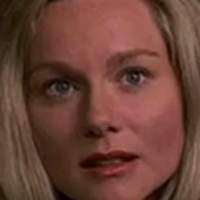

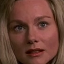

In [22]:
# Показываем случайное лицо и ее ресайз для дальнешего определения

frame = facesFromOnes_2[10]

facesFromOnes_2 = np.array(facesFromOnes_2)

cv2_imshow(frame)

resized_image = cv2.resize(frame, imSize) 
cv2_imshow(resized_image)

In [23]:
# тестируем сеть на лицах из видео ролика

resized_image = cv2.resize(frame, imSize) 

#test_image=image.load_img(,target_size=imSize)
test_image=image.img_to_array(resized_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=modelCNN.predict(test_image,verbose=0)
 
print('####'*20)
result_2 = 'Это не Джим'

if ResultMap[np.argmax(result)] == "face17_jim" :
   result_2 = "это Джим Керри! "

print(ResultMap[np.argmax(result)])
print('Prediction is: ', result_2)

################################################################################
face9
Prediction is:  Это не Джим


In [24]:
# Функция распознования лица

def jimFaces_CNN(img):

  resized_image = cv2.resize(img, imSize) 

  #test_image=image.load_img(,target_size=imSize)
  test_image=image.img_to_array(resized_image)
  
  test_image=np.expand_dims(test_image,axis=0)
  
  result=modelCNN.predict(test_image,verbose=0)
  
  results = False

  #print('####'*20)
  result_2 = 'Это не Джим'

  if ResultMap[np.argmax(result)] == "face17_jim" :
    result_2 = "это Джим Керри! "
    results = True

  #print(ResultMap[np.argmax(result)])
  #print('Prediction is: ', result_2)

  return results

In [25]:
# Функция проверки Джим это или нет с CNN моделью
# Создаем массив маску, которая хранит номера лиц с Джимом

arrFacesJim_CNN = []

print("всего лиц для обработки - ",len(facesFromOnes_2))
param = 0

for i in facesFromOnes_2:
  arrFacesJim_CNN.append(jimFaces_CNN(i))
  if param%100 == 0:
    print("Обработано ", param, " лиц")
  param += 1

print(len(arrFacesJim_CNN))
print(arrFacesJim_CNN)
print("всего обнаружено Джимов Керри - ", countJim_func(arrFacesJim_CNN))

всего лиц для обработки -  31516
Обработано  0  лиц
Обработано  100  лиц
Обработано  200  лиц
Обработано  300  лиц
Обработано  400  лиц
Обработано  500  лиц
Обработано  600  лиц
Обработано  700  лиц
Обработано  800  лиц
Обработано  900  лиц
Обработано  1000  лиц
Обработано  1100  лиц
Обработано  1200  лиц
Обработано  1300  лиц
Обработано  1400  лиц
Обработано  1500  лиц
Обработано  1600  лиц
Обработано  1700  лиц
Обработано  1800  лиц
Обработано  1900  лиц
Обработано  2000  лиц
Обработано  2100  лиц
Обработано  2200  лиц
Обработано  2300  лиц
Обработано  2400  лиц
Обработано  2500  лиц
Обработано  2600  лиц
Обработано  2700  лиц
Обработано  2800  лиц
Обработано  2900  лиц
Обработано  3000  лиц
Обработано  3100  лиц
Обработано  3200  лиц
Обработано  3300  лиц
Обработано  3400  лиц
Обработано  3500  лиц
Обработано  3600  лиц
Обработано  3700  лиц
Обработано  3800  лиц
Обработано  3900  лиц
Обработано  4000  лиц
Обработано  4100  лиц
Обработано  4200  лиц
Обработано  4300  лиц
Обработано 

NameError: ignored

In [26]:
# Функция которая вычисляет номер кадра по номеру лица

def clipFromFace_CNN(numFace):
  #print(len(arrClipFromVideo))
  numClip = 0
  numClip_2 = 0

  for i in range(len(arrClipFromVideo)):
    if numClip >= numFace:
      break
    else:
      numClip += arrClipFromVideo[i]
      numClip_2 += 1

  return numClip_2

print(clipFromFace_CNN(102))

92


In [27]:
# функция возвращает массив из номеров кадров для склейки

arrClipWithJim_CNN = []

print(len(arrFacesJim_CNN))

def arrClipWithJim_func_CNN():
  
  for i in range(len(arrFacesJim_CNN)):
    if arrFacesJim_CNN[i] == True:
      arrClipWithJim_CNN.append(clipFromFace_CNN(i))
  return arrClipWithJim_CNN

print(arrClipWithJim_func_CNN())

print(len(arrClipWithJim_CNN))

arrClipWithJim_CNN = np.unique(arrClipWithJim_CNN)

print("Номера кадров на которых есть Дим Керри")
print(arrClipWithJim_CNN)

print('Длинна массива с номерами кадров - ', len(arrClipWithJim_CNN))

31516
[16, 19, 20, 21, 22, 23, 24, 77, 78, 79, 80, 82, 83, 84, 85, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 105, 117, 118, 119, 120, 121, 122, 123, 135, 136, 136, 137, 149, 184, 184, 185, 186, 189, 190, 192, 194, 195, 196, 199, 200, 201, 202, 203, 205, 206, 207, 207, 207, 208, 208, 209, 209, 209, 210, 210, 211, 211, 211, 212, 212, 212, 213, 213, 213, 214, 214, 214, 215, 215, 215, 216, 216, 216, 217, 217, 218, 219, 220, 220, 223, 225, 226, 227, 231, 232, 238, 252, 257, 258, 261, 266, 266, 308, 308, 309, 310, 311, 312, 312, 313, 313, 314, 315, 317, 321, 321, 322, 322, 323, 324, 324, 325, 325, 326, 332, 334, 335, 336, 337, 338, 343, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 362, 363, 364, 365, 366, 368, 368, 369, 370, 371, 372, 373, 373, 374, 375, 375, 376, 377, 378, 378, 379, 379, 380, 380, 381, 381, 382, 383, 383, 384, 385, 385, 386, 386, 387, 387, 388, 389, 390, 391, 391, 392, 393, 394, 395, 396, 397, 398, 399, 40

In [28]:
# Считаем экранное время с Джимом

def countMinuts():
  print("Всего КАДРОВ с Джимом Керри - ",countJim_func(), " кадров в отрезке")
  print("Всего СЕКУНД с Джимом Керри - ",countJim_func()/24, " секунд в отрезке")
  print("Всего МИНУТ с Джимом Керри - ",countJim_func()/24/60, " минут в отрезке")

countMinuts()

Всего КАДРОВ с Джимом Керри -  8575  кадров в отрезке
Всего СЕКУНД с Джимом Керри -  357.2916666666667  секунд в отрезке
Всего МИНУТ с Джимом Керри -  5.954861111111112  минут в отрезке


### **Создаем видео ролик из картинок с Джимом**

In [29]:
print(arrClipWithJim_CNN)
print(len(arrClipWithJim_CNN))

[   16    19    20 ... 29607 29608 29609]
8575


In [30]:
print(len(facesFromOnes))
print(len(facesFromOnes_2))

29624
31516


In [31]:
# Создаем видео ролик с Джимом

video_name = 'videoWithJim_TestFile_2_15.mp4'

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
#fourcc = cv2.VideoWriter_fourcc(*'XVID')

video = cv2.VideoWriter(video_name, fourcc, 24, (720,408))

# Загружаем видео файл покадрово
cap_after = cv2.VideoCapture(pathVideo)
p_after = 0

if (cap_after.isOpened() == False): 
  print("Error opening video stream or file")

while cap_after.isOpened():
    ret, image_Opened_2 = cap_after.read()

    if p_after in arrClipWithJim_CNN:
      #img = cv2.cvtColor(image_Opened_2,cv2.COLOR_GRAY2RGB)
      video.write(image_Opened_2)
    #print("p_after = ", p_after)
    
    #cv2_imshow(image_Opened_2)
    if not ret:
      break


    #print(p_after)
    p_after+=1

cv2.destroyAllWindows()

video.release()

print("Видео ролик с Джимом сохранен")

# Выводим количество экранного времени Джима в отрезке
countMinuts()

Видео ролик с Джимом сохранен
Всего КАДРОВ с Джимом Керри -  8575  кадров в отрезке
Всего СЕКУНД с Джимом Керри -  357.2916666666667  секунд в отрезке
Всего МИНУТ с Джимом Керри -  5.954861111111112  минут в отрезке
